In [1]:
import matplotlib.pyplot as plt
from zoning import *
from mobility_data_analysis_toolbox import *
from macroscopic_traffic_model import *
from statistical_models_and_forecasters import *
from macroscopic_traffic_model import Macroscopic_traffic_model

C:\Users\roberto.rocchetta.in\OneDrive - SUPSI\Desktop\GAMES project\Codes\neurips2022\citylearn-2022-starter-kit\venv\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = data_loader(data_dir='datasets/autotel', file_name='autotel_2021_2022.pkl')
TelAviv = Macroscopic_traffic_model(geographical_area = 'Tel Aviv, Israel')
lon_min, lon_max, lat_min, lat_max = TelAviv.get_minmax_lon_lat() # get minimum and maximum latitudes, longitudes from the street graph
_, df_sequence = preprocess_trip_data_frame(df, lon_min, lon_max, lat_min, lat_max )

Loading data:autotel_2021_2022.pkl
Done -- dataset length = 1033624
filtering min(lat,lon) = (32.0294316, 34.7430645), and max(lat,lon) = (32.1446891, 34.8445086)
Done -- remaining data length = 1033179
Pre-processing data
--- filtering speeds <=130 [km/h]
--- filtering distances <=70 [km]
add holidays and minutes between reservation and return
--- dropping nan rows
Done -- processed dataset length = 1029673
Transform the DataFrame in a longitudinal df:
Done
compute mobility event duration (trips/idle times) in minutes
Done -- event durations


In [3]:
# Create and fit the model
model_wrapper = MobilityDemandForecaster()
model_dir = 'models/autotel'
model_save_path = os.path.join(model_dir, 'model_wrapper.pkl')
H_past, H_future =12, 24
X_tst, y_tst , X_train, y_train = prepare_forecaster_data(df_sequence, H_past=H_past, H_future=H_future,n_test=500)

Preparing matrix of daily arrivals departures and vehicle presence
Done


model_wrapper.fit(X, y)
modelfolder = 'models/autotel' # Specify the subfolder path
if not os.path.exists(modelfolder): # Create the subfolder if it doesn't exist
    os.makedirs(modelfolder)
model_save_path = os.path.join(modelfolder, 'model_wrapper.pkl')
with open(model_save_path, 'wb') as f: # Save the entire class with trained parameters in the subfolder
    pickle.dump(model_wrapper, f)

In [4]:
# Load the model wrapper
with open(model_save_path, 'rb') as f:
    model_wrapper = pickle.load(f)
model_wrapper.model
best_parameters = model_wrapper.best_parameters # Access the trained parameters
prediction, uncertainty_band = model_wrapper.predict(X_tst) # Use the model wrapper and its trained parameters

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


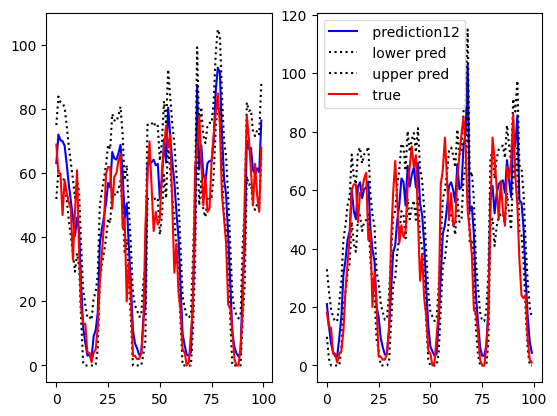

In [5]:
predict_t, T_plot = 0, 100
fig, ax = plt.subplots(1,2)
ax[0].plot(prediction[:,predict_t][:T_plot],'b', label = ' prediction t' +str(predict_t))
ax[0].plot(uncertainty_band[0][:,predict_t][:T_plot],':k', label = ' lower pred')
ax[0].plot(uncertainty_band[1][:,predict_t][:T_plot],':k', label = ' upper pred')
ax[0].plot(y_tst.iloc[:,predict_t][:T_plot], 'r', label = ' true')
predict_t, T_plot =12, 100
ax[1].plot(prediction[:,predict_t][:T_plot],'b', label = ' prediction'+str(predict_t))
ax[1].plot(uncertainty_band[0][:,predict_t][:T_plot],':k', label = ' lower pred')
ax[1].plot(uncertainty_band[1][:,predict_t][:T_plot],':k', label = ' upper pred')
ax[1].plot(y_tst.iloc[:,predict_t][:T_plot], 'r', label = ' true') ;
plt.legend()
